In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(2023 - 4 - 9)

# ___Univariate Data___
-----------------

## ___Categorical Data___
---------------

In [10]:
# Categorical data simply classifies items into groups.

In [11]:
# Let's make some synthetic data.

In [38]:
ids = np.random.randint(62_220, 64_555, size = 5560)

In [39]:
mstat = np.random.randint(1, 9, size = 5560)

In [40]:
data = pd.DataFrame({"ID": ids, "marital_status": mstat})

In [35]:
# Marital status
# 1 - married
# 2 - widowed
# 3 - divorced
# 4 - separated
# 5 - never married
# 6 - living with partner
# 7 - refused
# 8 - don't know

In [36]:
lookup = {
    1 : "married",
    2 : "widowed",
    3 : "divorced",
    4 : "separated",
    5 : "never married",
    6 : "living with partner",
    7 : "refused",
    8 : "don't know"
}


In [42]:
# Most common way to summarize categorical data is with a frequency table.
# Divide by the total number of people and multiply by 100 to get the percentage.

pd.DataFrame({"status": lookup.values(), "count": data.marital_status.value_counts(), "percent": data.marital_status.value_counts() / 55.6},
            index = lookup.keys())

,status,count,percent
1,married,705,12.679856
2,widowed,681,12.248201
3,divorced,666,11.978417
4,separated,700,12.589928
5,never married,703,12.643885
6,living with partner,714,12.841727
7,refused,695,12.500000
8,don't know,696,12.517986


## ___Bar charts___
-----------

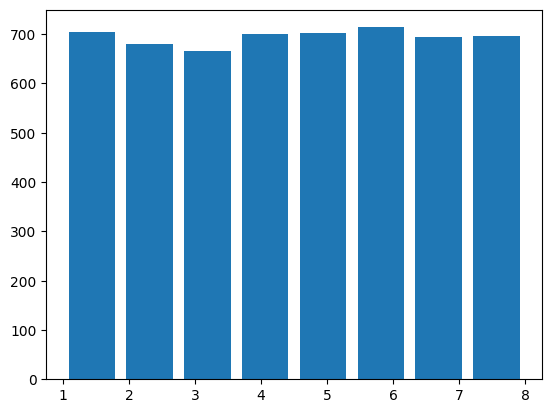

In [50]:
# Most common way to visualize categorical data is with a bar chart (Not histograms)

plt.hist(data.marital_status, bins = 8, rwidth = 0.8)
plt.show()

In [ ]:
# Instead of counts, one cound also show the percent frequency on the y axis.